In [14]:
import numpy as np
import pandas as pd
from obspy import read
from scipy.stats import norm
import matplotlib.pyplot as plt
import os
import re
import features as ft

Espectrogramas 21 de mayo de 2023 (fase eruptiva)

In [47]:
def plot_signal(tr):
    """
    Plot the waveform and spectrogram (with color bar) of a seismic trace.

    Parameters:
    - tr: ObsPy Trace object
        Seismic trace to plot.

    Displays:
    - A figure with three axes:
        - Top: Waveform (amplitude vs. time)
        - Middle: Spectrogram (logarithmic scale, dB)
        - Right: Color bar for spectrogram
    """
    sps = int(tr.stats.sampling_rate)
    fig = plt.figure()
    ax1 = fig.add_axes([0.1, 0.75, 0.7, 0.5])  # waveform
    ax2 = fig.add_axes([0.1, 0.1, 0.7, 0.5], sharex=ax1)  # spectrogram
    ax3 = fig.add_axes([0.83, 0.1, 0.03, 0.5])  # colorbar

    # Time vector for waveform
    t = np.arange(tr.stats.npts) / tr.stats.sampling_rate
    ax1.plot(t, tr.copy().data, 'k')
    ax1.set_ylabel('Amplitude')

    # Spectrogram
    tr.spectrogram(wlen=.1*sps, per_lap=0.50, dbscale=True, log=True, axes=ax2)
    ax2.set_ylabel('Frequency (Hz)')
    ax2.set_ylim((0.1, 50))

    # Set color limits and add colorbar
    ax2.collections[0].set_clim(vmin=-10, vmax=100)
    mappable = ax2.collections[0]
    cb = plt.colorbar(mappable=mappable, cax=ax3, ticks=np.arange(-10, 100, 10))
    cb.set_label('Power (dB/Hz)')

    ax1.set_title('Waveform and Spectrogram '+ str(tr.stats.starttime))
    ax2.set_xlabel('Time (s)')
    return fig

Saved: D:\Popocatepetl\figures\spectrogram_20230521_000000.png
Saved: D:\Popocatepetl\figures\spectrogram_20230521_010000.png
Saved: D:\Popocatepetl\figures\spectrogram_20230521_020000.png
Saved: D:\Popocatepetl\figures\spectrogram_20230521_030000.png
Saved: D:\Popocatepetl\figures\spectrogram_20230521_040000.png
Saved: D:\Popocatepetl\figures\spectrogram_20230521_050000.png
Saved: D:\Popocatepetl\figures\spectrogram_20230521_060000.png
Saved: D:\Popocatepetl\figures\spectrogram_20230521_070000.png
Saved: D:\Popocatepetl\figures\spectrogram_20230521_080000.png
Saved: D:\Popocatepetl\figures\spectrogram_20230521_090000.png
Saved: D:\Popocatepetl\figures\spectrogram_20230521_100000.png
Saved: D:\Popocatepetl\figures\spectrogram_20230521_110000.png
Saved: D:\Popocatepetl\figures\spectrogram_20230521_120000.png
Saved: D:\Popocatepetl\figures\spectrogram_20230521_130000.png
Saved: D:\Popocatepetl\figures\spectrogram_20230521_140000.png
Saved: D:\Popocatepetl\figures\spectrogram_20230521_150

C:\Users\javie\AppData\Local\Temp\ipykernel_17632\2341048645.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


Saved: D:\Popocatepetl\figures\spectrogram_20230521_200000.png
Saved: D:\Popocatepetl\figures\spectrogram_20230521_210000.png
Saved: D:\Popocatepetl\figures\spectrogram_20230521_220000.png
Saved: D:\Popocatepetl\figures\spectrogram_20230521_230000.png


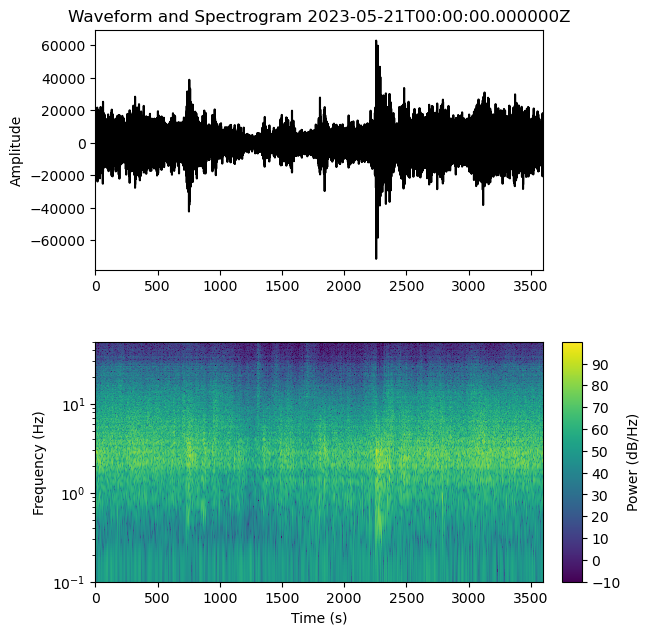

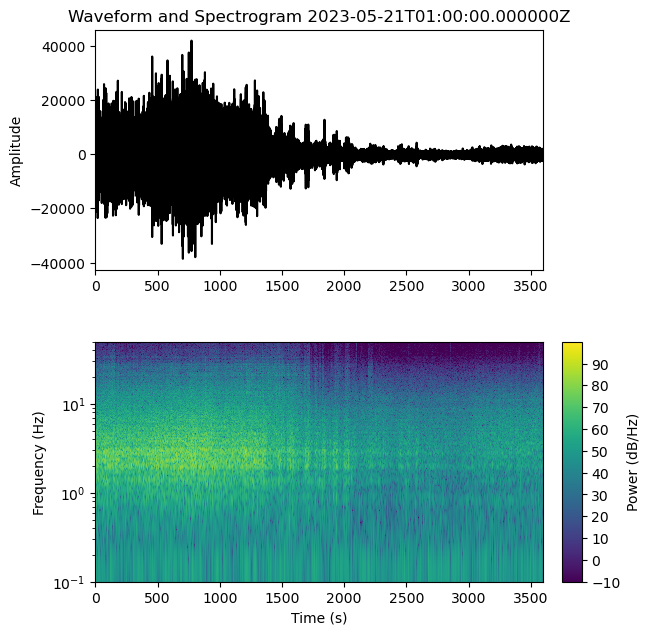

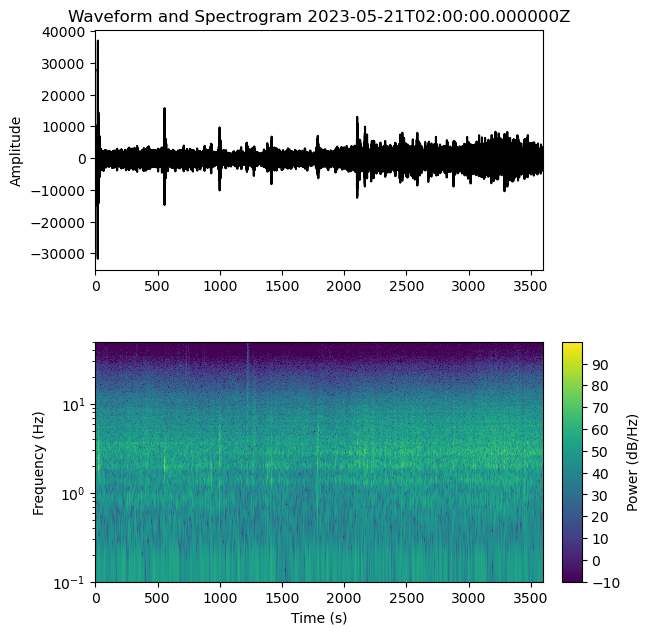

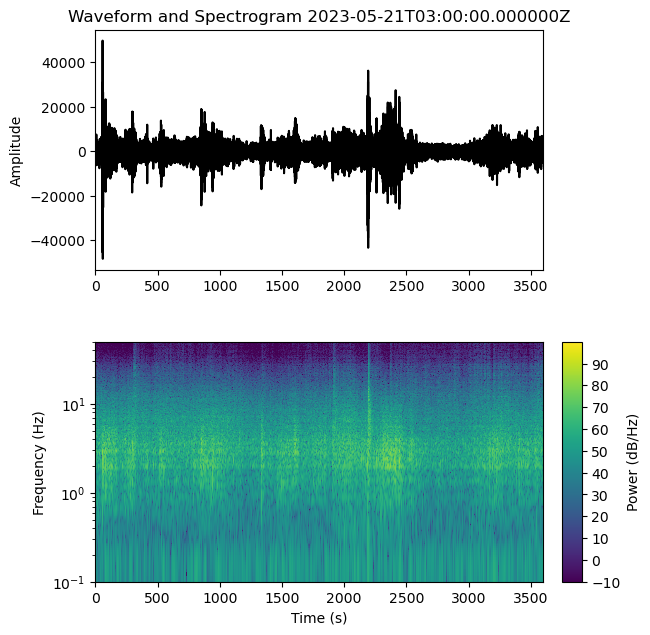

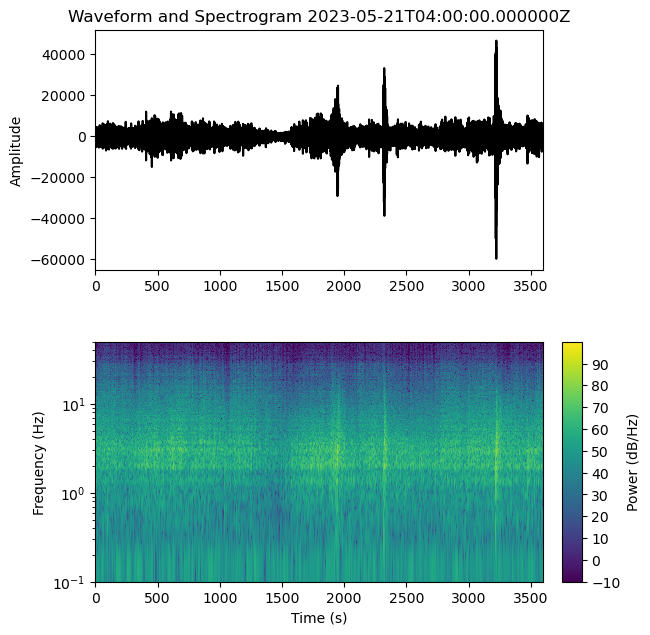

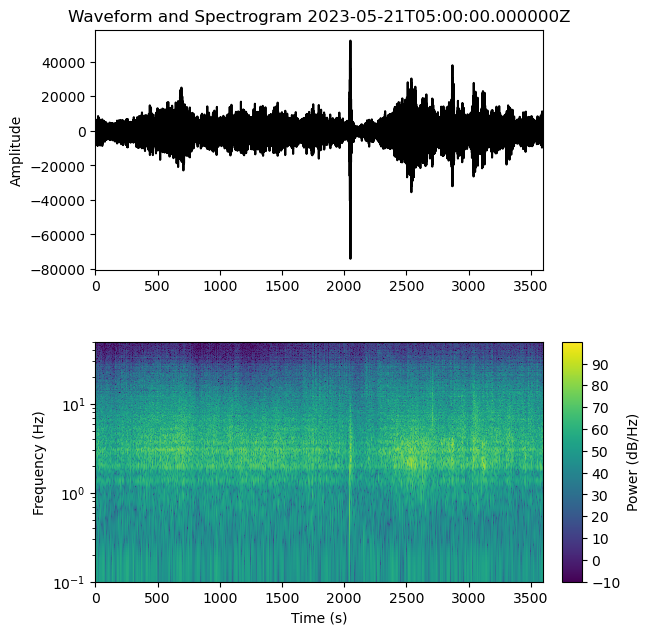

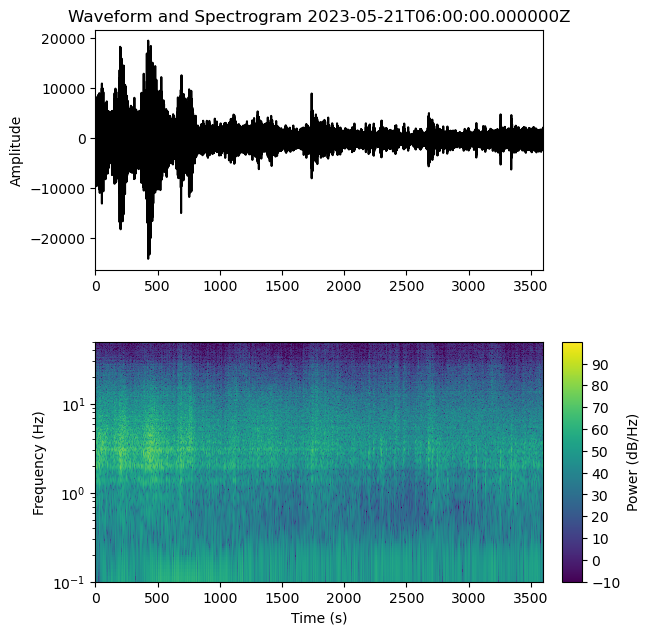

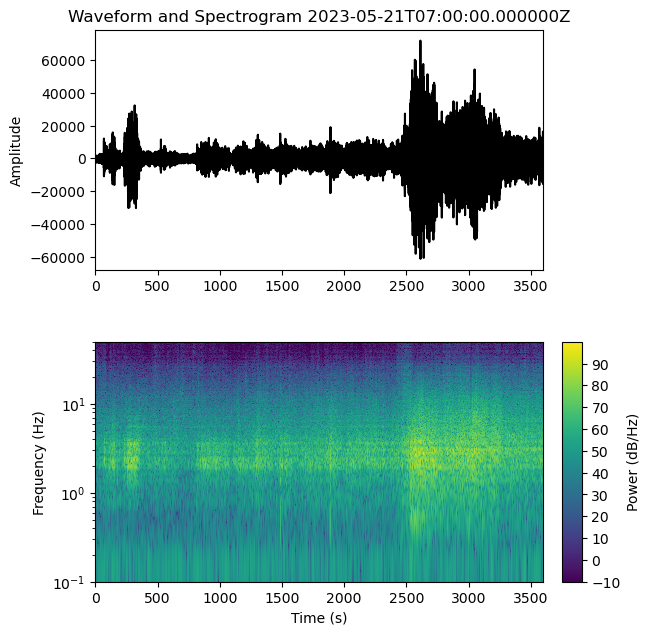

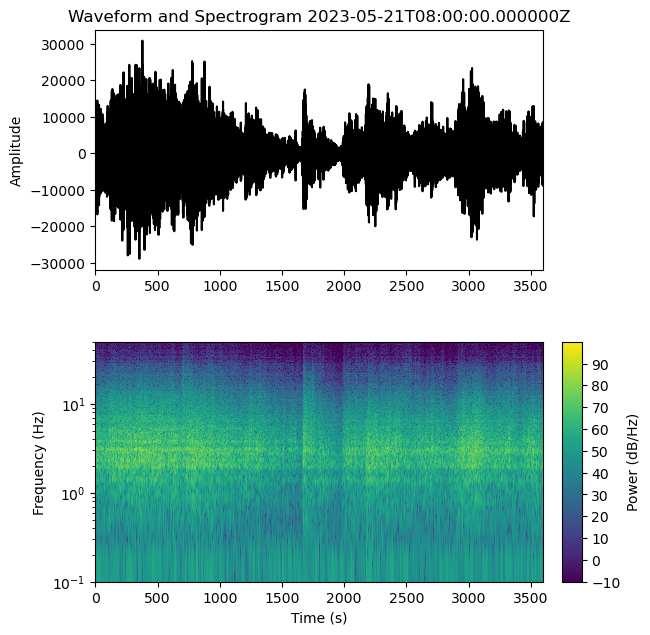

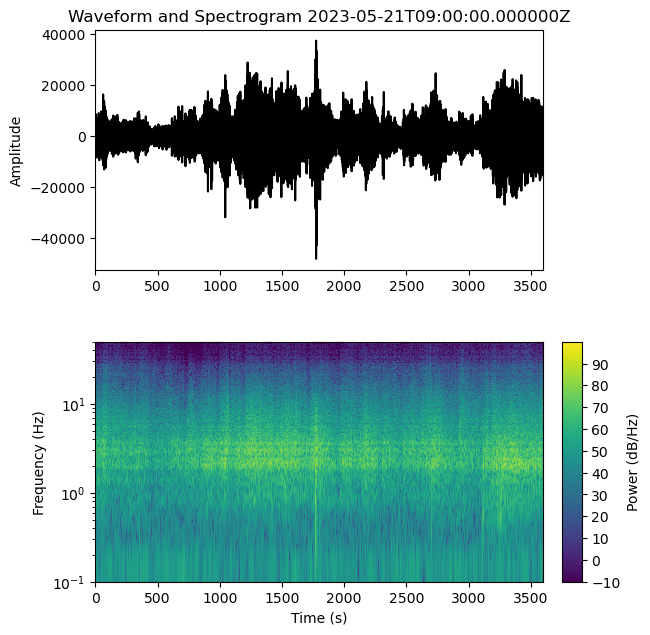

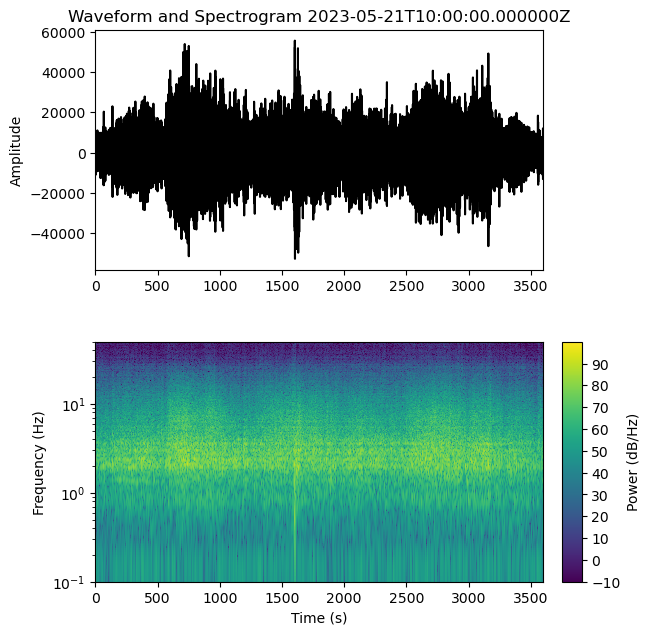

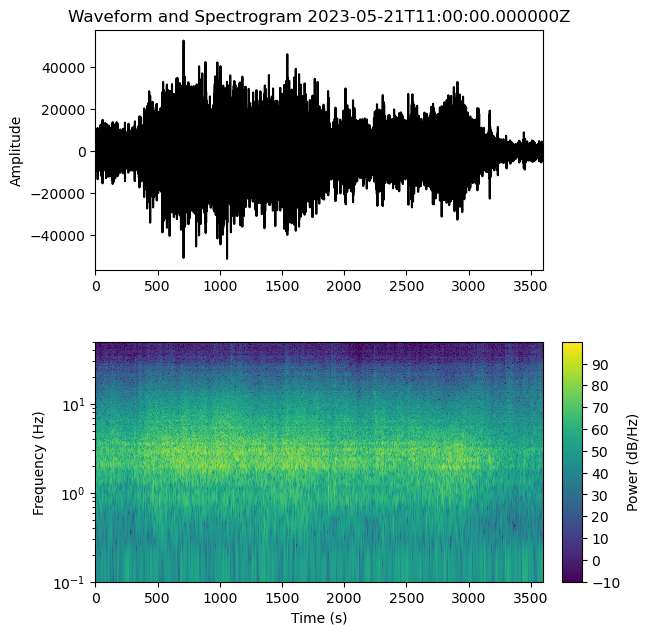

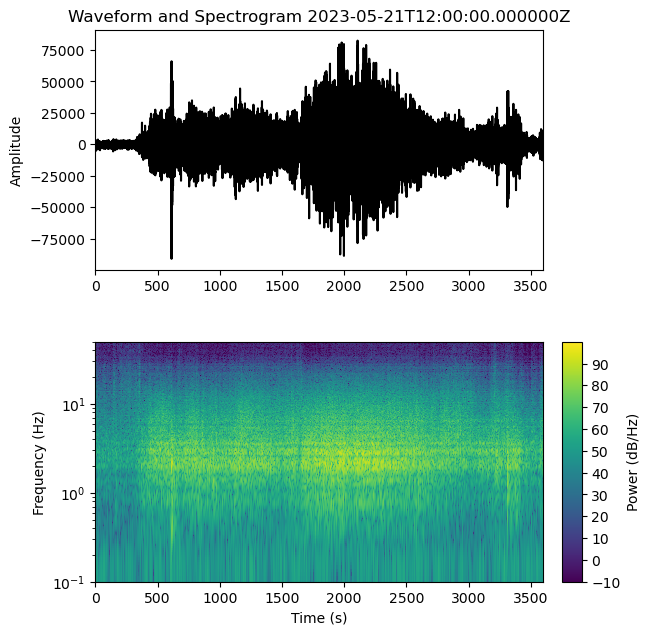

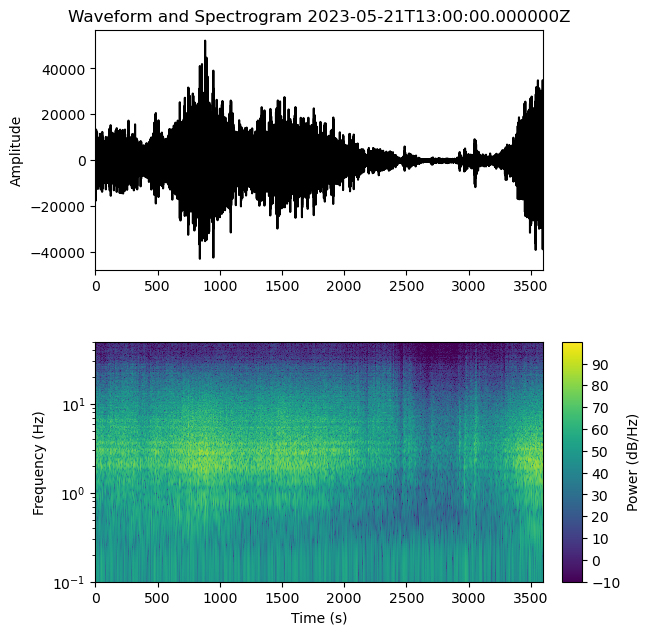

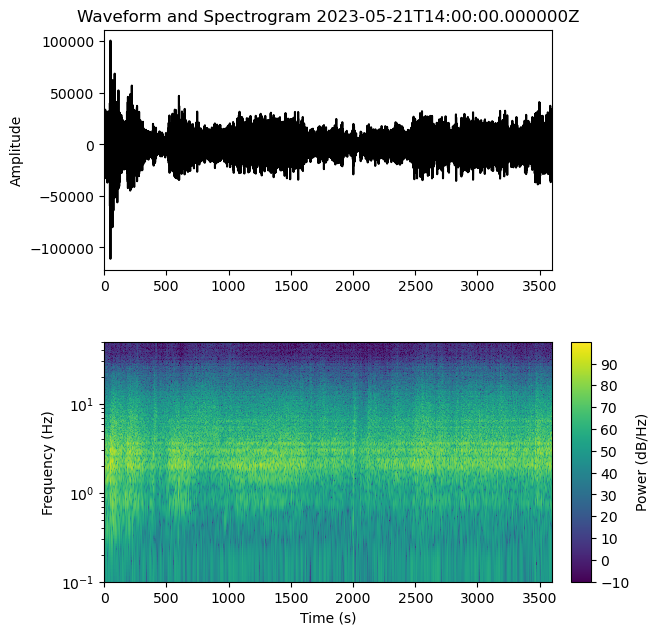

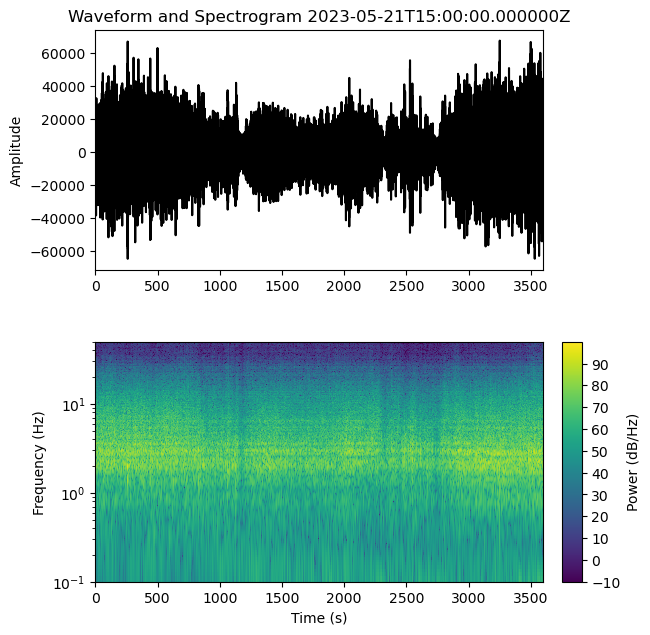

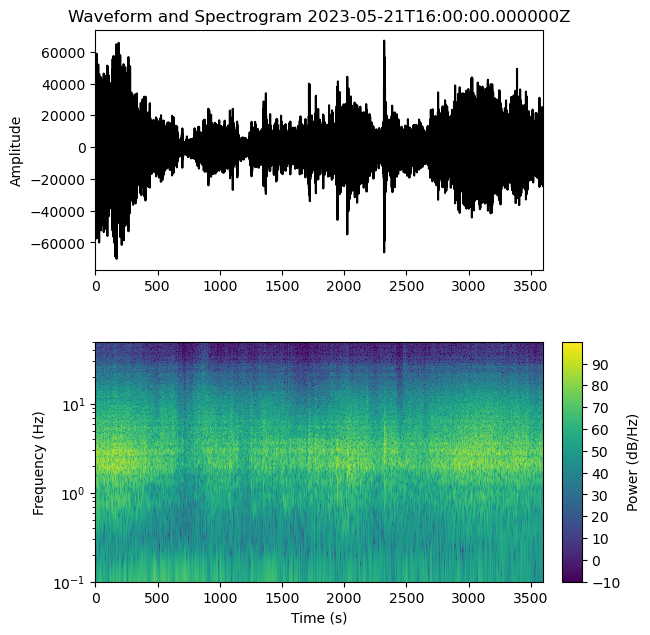

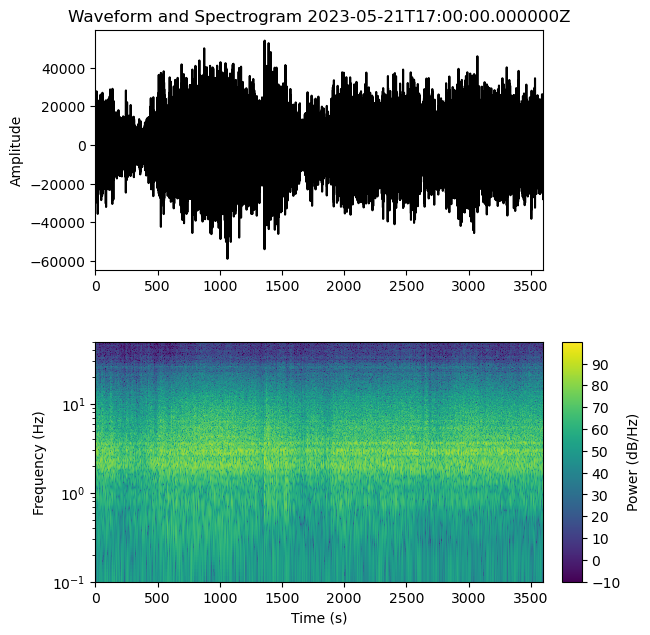

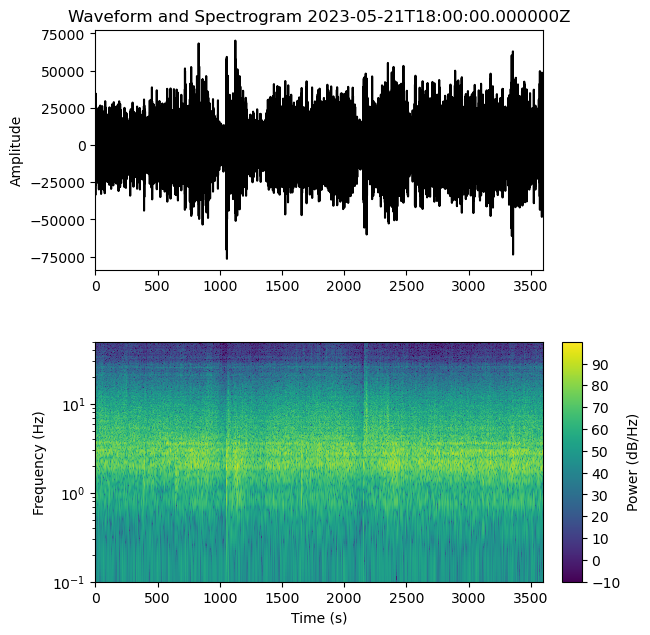

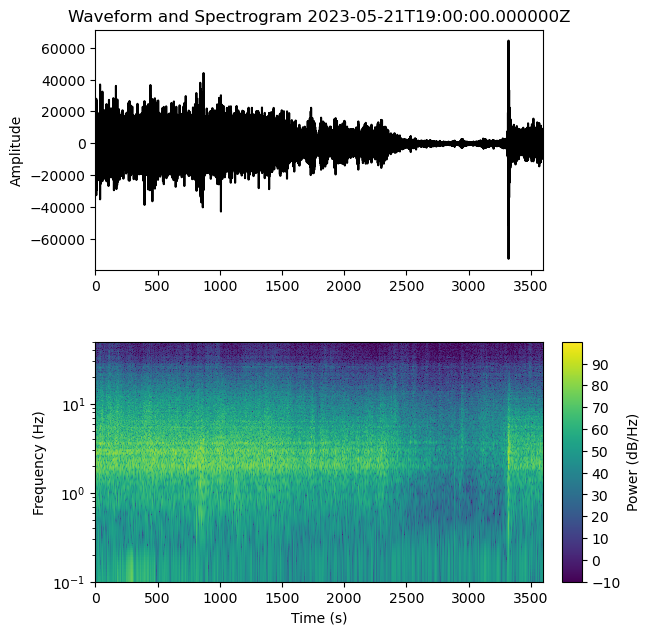

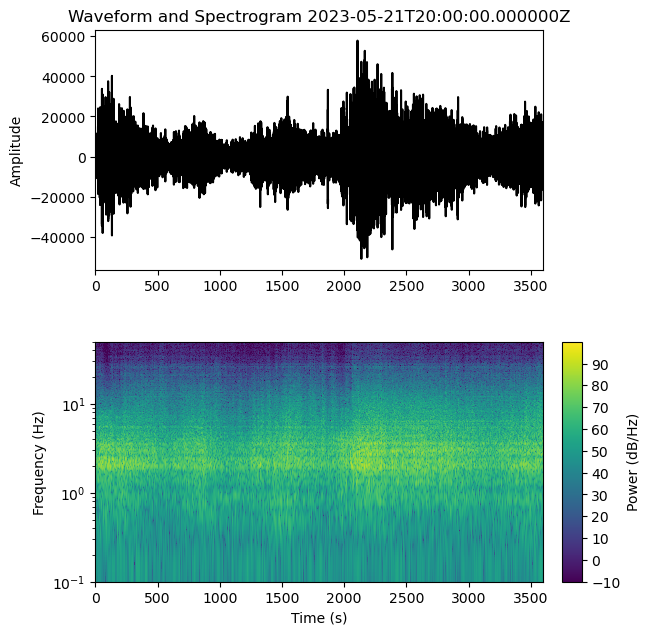

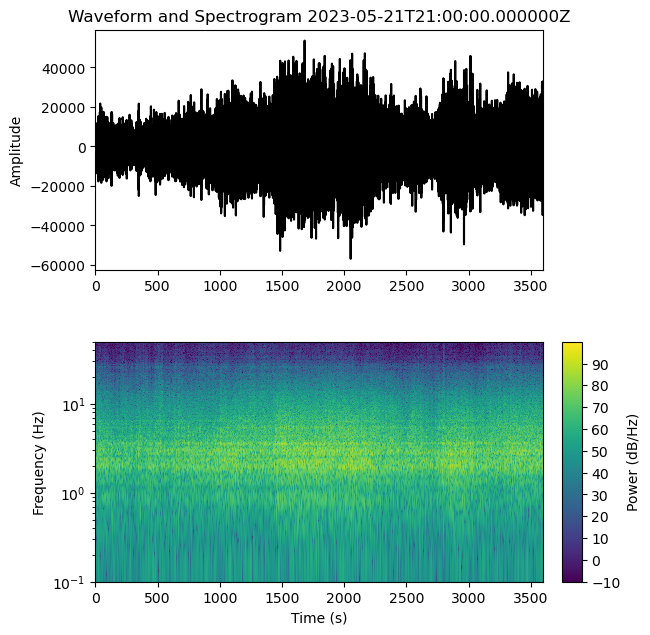

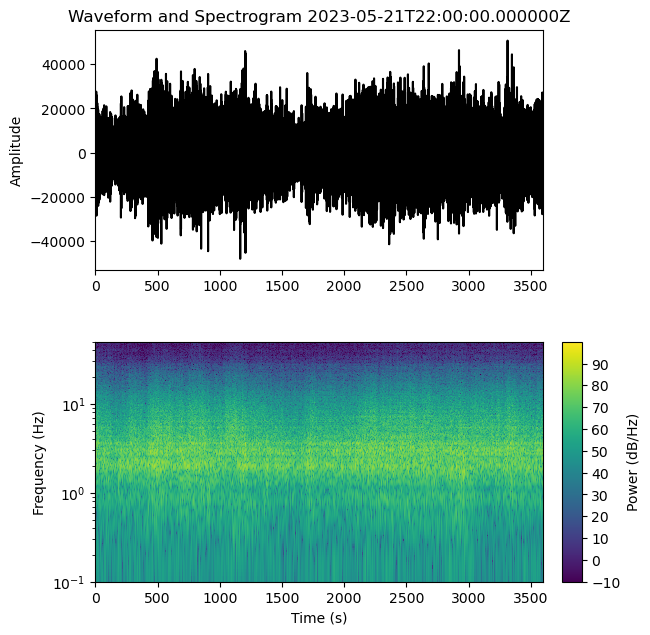

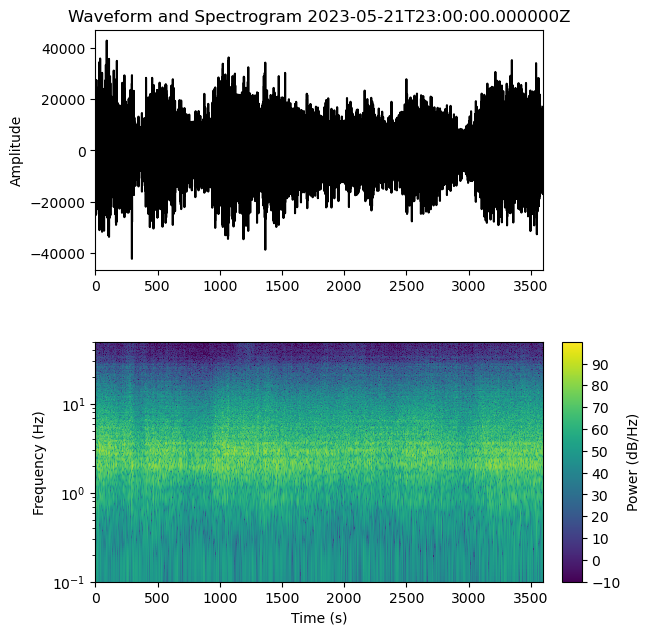

In [ ]:
# Change working directory
os.chdir("D:/Popocatepetl")
# Select the date
Year = "2023"
Month = "05"
Day = "21"
# List files in the directory for the selected date
paths = os.listdir("D:/Popocatepetl/data/"+Year+"/"+Month+"/"+Day)
paths_PPPP = [x for x in paths if re.match(r'^{}'.format('CN.PPPP'), x)]
i = 0

while i < 24:
    # Read the seismic data
    st = read("data/"+Year+"/"+Month+"/"+Day+"/"+paths_PPPP[i])
    # Select vertical component and resample
    st = st.select(component='Z')
    st = st.resample(sampling_rate=100)
    # Plots the waveform and spectrogram of the seismic trace using the `plot_signal` function.
    fig = plot_signal(st[0])
    # Saves the generated figure to a specified output path, creating the necessary directories if they do not exist.
    out_path = r"D:\Popocatepetl\figures\spectrogram_20230521_"+paths_PPPP[i].split("_")[2].split(".")[0]+".png"
    os.makedirs(os.path.dirname(out_path), exist_ok=True)
    fig.savefig(out_path, dpi=300, bbox_inches='tight')
    # Prints a confirmation message indicating the saved file path.
    print("Saved:", out_path)
    i += 1